In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from DKVMN.utils import *

log_path = 'log'
data_stat_path = 'DKVMN/log'

dataset_list = [
#     'assist2009_updated',
#     'assist2015',
#     'STATICS',
    'synthetic',
]
               
ordering_list = [
#     'best_permutation',
    'maxprob',
#     'permutation',
#     'ascending',
#     'descending',
#     'permutation_fixed',
]

knowledge_list = [
    'origin',
    'summary',
]

learning_rate = 0.6
niLoss_weight_list = [
    0.0,
#     0.0001,
]

repeat_start = 0
repeat_end = 10

In [3]:
def get_model_name(knowledge, niLoss_weight, repeat_idx):
    return 'knowledge_{}_niLoss_{}_rIdx_{}'.format(knowledge, niLoss_weight, repeat_idx)

In [69]:
def load_data(dataset, model_name, ordering):
    dir_path = os.path.join(log_path, dataset, model_name, ordering)
#     print(dir_path)
    
    total_df = pd.read_csv(os.path.join(dir_path,'total_prob.result'), header=None, squeeze=True)
    avg_df = pd.read_csv(os.path.join(dir_path,'avg_prob.result'), header=None, squeeze=True)
#     print(avg_df.describe())
    dist_df = pd.read_csv(os.path.join(dir_path,'dist.result'), header=None)
    
    
    return total_df, avg_df, dist_df

In [ ]:
# Dataset Stat


In [98]:
# Scearnio analysis

name_list = []
avg_prob_list = []

for dataset in dataset_list:
    for knowledge in knowledge_list:
        for niLoss_weight in niLoss_weight_list:
            
            for ordering in ordering_list:
                print('{}/{}/{}/{}'.format(dataset, knowledge, niLoss_weight,ordering))

                avg_avg = np.zeros(111)
                for repeat_idx in range(repeat_start, repeat_end):

                    model_name = get_model_name(knowledge, niLoss_weight, repeat_idx)
                    total_df, avg_df, dist_df = load_data(dataset, model_name, ordering)
                    print(total_df.shape)

#                     print(total_df.describe())
                    avg_avg += avg_df.values
                    for i in range(total_df.shape[1]):
                        print(i)
                        seq_analysis(total_df.iloc[:,i].values)

                name = "{}_niLoss_{}_{}".format(knowledge,niLoss_weight,ordering)
                name_list.append("{}_niLoss_{}".format(knowledge,niLoss_weight))
                avg_prob_list.append(avg_avg/(repeat_end-repeat_start))

assist2009_updated/origin/0.0/maxprob
(111, 110)
0
57 52
0.0176, -0.0124
1
68 41
0.0255, -0.0372
2
69 40
0.0303, -0.0445
3
47 55
0.0302, -0.0190
4
57 52
0.0501, -0.0470
5
60 49
0.0347, -0.0339
6
40 37
0.1020, -0.0964
7
58 49
0.0504, -0.0510
8
49 56
0.0385, -0.0251
9
60 50
0.0157, -0.0160
10
67 43
0.0094, -0.0076
11
63 44
0.0161, -0.0203
12
60 45
0.0313, -0.0302
13
63 45
0.0287, -0.0312
14
40 46
0.0518, -0.0342
15
51 56
0.0235, -0.0137
16
51 58
0.0248, -0.0146
17
55 53
0.0526, -0.0456
18
56 51
0.0207, -0.0147
19
53 57
0.0181, -0.0097
20
60 50
0.0166, -0.0117
21
49 44
0.0247, -0.0175
22
39 38
0.1130, -0.1026
23
62 47
0.0303, -0.0307
24
53 55
0.0217, -0.0148
25
59 51
0.0114, -0.0071
26
53 55
0.0221, -0.0140
27
65 44
0.0174, -0.0155
28
55 48
0.0308, -0.0368
29
55 53
0.0314, -0.0236
30
66 43
0.0075, -0.0044
31
48 57
0.0266, -0.0155
32
51 57
0.0222, -0.0135
33
61 49
0.0135, -0.0091
34
61 45
0.0264, -0.0249
35
58 52
0.0513, -0.0508
36
53 50
0.0276, -0.0216
37
58 51
0.0165, -0.0112
38
53 56
0.

In [96]:
def seq_analysis(seq):
    pos_list = list()
    neg_list = list()
#     neu_count = list()
    for i in range(len(seq)-1):
        diff = seq[i+1] - seq[i]
        if diff > 0:
            pos_list.append(diff)
        elif diff < 0:
            neg_list.append(diff)
    
    print(len(pos_list), len(neg_list))
    print('{:.4f}, {:.4f}'.format(np.average(pos_list), np.average(neg_list)))
#         print(i)
#     print(len(seq))

['origin_niLoss_0.0']


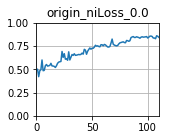

In [74]:
print(name_list)
plt.figure(1)

for idx, name in enumerate(name_list):
    plt.subplot(2,2,idx+1)
    plt.plot(avg_prob_list[idx])
    plt.title(name)
    plt.ylim(0,1)
    plt.xlim(0,110)
    plt.grid(True)
    
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.6, wspace=1)
plt.savefig("Result/{}.png".format(ordering_list[0]))
plt.show()

In [11]:
def filter_result_with_threshold(target, pred, q, th=0):
#     print(target)
#     print(pred)
#     print(q)
    
    unique_item = np.unique(q)
#     print(unique_item)
    for item in unique_item:
        if np.sum(q == item) < th:
            del_idx = np.where(q == item)
            target = np.delete(target, del_idx)
            pred = np.delete(pred, del_idx)
            q = np.delete(q, del_idx)

    return target, pred, q

In [39]:
# Test set detail anlaysis

for dataset in dataset_list:
    for knowledge in knowledge_list:
        for niLoss_weight in niLoss_weight_list:
            print('{}/{}/{}'.format(dataset, knowledge, niLoss_weight))
            
            for repeat_idx in range(repeat_start, repeat_end):

                model_name = get_model_name(knowledge, niLoss_weight, repeat_idx)
                dir_path = os.path.join(log_path, dataset, model_name)
                df = pd.read_csv(os.path.join(dir_path,'test_detail.result'), header=None, squeeze=True).T

                q = df.iloc[:,0].values
                pred = df.iloc[:,1].values
                target = df.iloc[:,2].values
                
#                 test_auc, test_accuracy = calculate_auc_acc(target, pred)
#                 print('{: .4f}, {: .4f}'.format(test_auc, test_accuracy))
                
                count, metric_for_each_q = calculate_metric_for_each_q(target, pred, q, 110)
                for (idx, metric) in enumerate(metric_for_each_q):
                    print('{:<3d}: {:>7d}, {: .4f}, {: .4f}'.format(idx+1, count[idx], metric[0], metric[1]))
            
                for th in range(10,210,10):
                    filtered_target, filtered_pred, filtered_q = filter_result_with_threshold(target, pred, q, th)
                    test_auc, test_accuracy = calculate_auc_acc(filtered_target, filtered_pred)
                    print('{:3d}, {: .4f}, {: .4f}'.format(th, test_auc, test_accuracy))

assist2009_updated/origin/0.0
 0.8214,  0.7741
 0.8222,  0.7738
 0.8226,  0.7739
 0.8229,  0.7750
 0.8225,  0.7758
 0.8219,  0.7752
 0.8216,  0.7745
 0.8227,  0.7737
 0.8221,  0.7747
 0.8212,  0.7746


In [6]:
# Test set result anlaysis
# todo : collect result for latex format 

for dataset in dataset_list:
    for knowledge in knowledge_list:
        for niLoss_weight in niLoss_weight_list:
            print('\n{}/{}/{}'.format(dataset, knowledge, niLoss_weight))
            test_auc_list = []
            test_acc_list = []
            
            for repeat_idx in range(repeat_start, repeat_end):

                model_name = get_model_name(knowledge, niLoss_weight, repeat_idx)
                dir_path = os.path.join(log_path, dataset, model_name)
                df = pd.read_csv(os.path.join(dir_path,'test_result.result'), header=None, squeeze=True)
                
                test_auc_list.append(df.values.squeeze()[0])
                test_acc_list.append(df.values.squeeze()[1])

            print(test_auc_list)
            print('{:.4f}, {:.4f}'.format(np.average(test_auc_list), np.std(test_auc_list)))
            print(test_acc_list)
            print('{:.4f}, {:.4f}'.format(np.average(test_acc_list), np.std(test_acc_list)))


synthetic/origin/0.0
[0.8306, 0.8268, 0.8323, 0.8317, 0.8284, 0.8297, 0.8309, 0.8324, 0.83, 0.8319]
0.8305, 0.0017
[0.7525, 0.7484, 0.7537, 0.7525, 0.7498, 0.7502, 0.7516, 0.7539, 0.7512, 0.7538]
0.7518, 0.0018

synthetic/summary/0.0
[0.6501, 0.823, 0.5245, 0.8251, 0.6571, 0.8239, 0.8232, 0.8207, 0.8229, 0.6313]
0.7402, 0.1071
[0.6336, 0.7451, 0.5987, 0.7471, 0.6299, 0.7467, 0.7471, 0.7427, 0.7442, 0.6235]
0.6959, 0.0614
